In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [4]:
import numpy as np
import pandas as pd

In [5]:
a = tf.add(3,5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [7]:
sess = tf.Session()

print(sess.run(a))

sess.close()

8


In [8]:
with tf.Session() as sess:
    print(sess.run(a))

8


In [18]:
x = 2
y = 3

op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
useless = tf.multiply(x,op1)
op3 = tf.pow(op2,op1)

with tf.Session() as sess:
    op3, useless = sess.run([op3, useless])
    print(op3, useless)

7776 10


# 03 - Linear Regression

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [90]:
# 데이터 로드
x_data = datasets.fetch_openml(name='boston',version=1).data.iloc[:,12]
y_data = datasets.fetch_openml(name='boston',version=1).target

In [89]:
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [91]:
w = tf.Variable(tf.random_normal([1])) # parameter 세타 정규분포로부터 랜덤하게 초기화
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b

loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # MSE (평균 제곱 오차)
optimizer = tf.train.GradientDescentOptimizer(0.001) # learning rate
train = optimizer.minimize(loss)

In [98]:
# for name in dir(tf.train):
#     if 'Optimizer' in name:
#         print(name)

In [102]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variable 초기화

    for step in range(10000): # epoch
        sess.run(train) # 실제 gradient descent 실행되는 코드

        # 1천번마다 확인용
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w),sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
        #################

    w_out, b_out = sess.run([w,b]) # 마지막 세타값으로 run

Step 0: w [0.3779239] b [0.0841812]
loss 440.3485107421875

Step 1000: w [0.32782063] b [13.269212]
loss 147.76034545898438

Step 2000: w [-0.15996341] b [21.393906]
loss 80.25692749023438

Step 3000: w [-0.46154943] b [26.417225]
loss 54.4522590637207

Step 4000: w [-0.6480176] b [29.523098]
loss 44.587642669677734

Step 5000: w [-0.7633086] b [31.443424]
loss 40.816612243652344

Step 6000: w [-0.83458996] b [32.63071]
loss 39.37507247924805

Step 7000: w [-0.8786624] b [33.364796]
loss 38.823997497558594

Step 8000: w [-0.90591127] b [33.818665]
loss 38.61333465576172

Step 9000: w [-0.9227593] b [34.099285]
loss 38.532806396484375



In [103]:
w_out

array([-0.9331684], dtype=float32)

In [104]:
b_out

array([34.272663], dtype=float32)

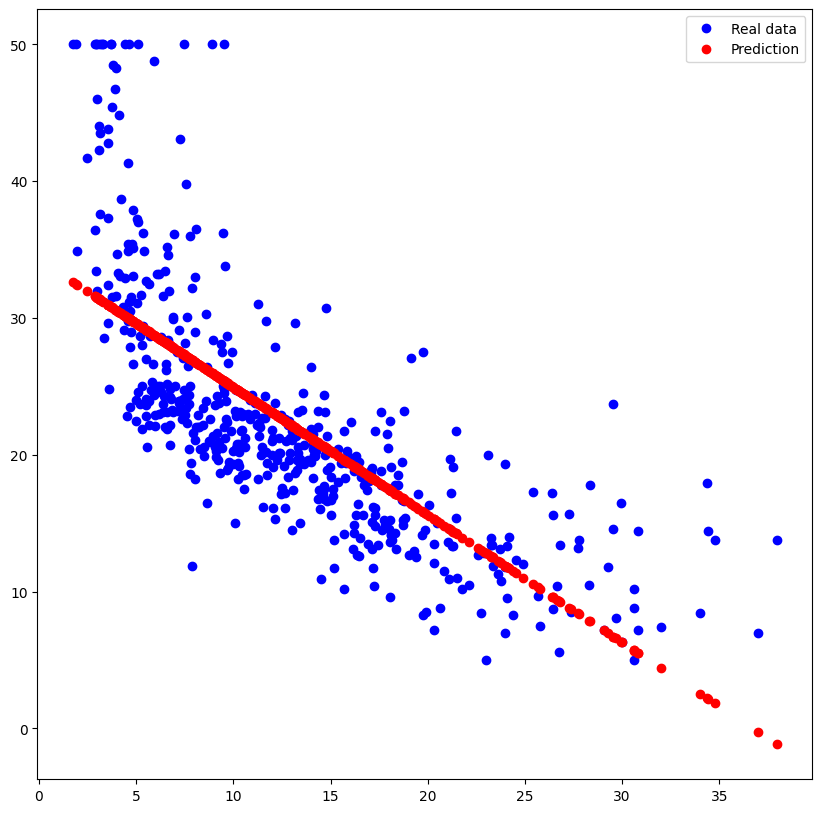

In [105]:
plt.figure(figsize= (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()